<a href="https://colab.research.google.com/github/b03613032/QM-final/blob/main/QM_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages

In [1]:
from numpy import exp,pi,sqrt,abs
import numpy as np
import matplotlib.pyplot as plt
import math

Defining the range of finding the optimized R and k

In [2]:
L_R = np.arange(0.2, 10.001, 0.001)
L_k = np.arange(0,3.001,0.001)

Finding the optimized k for each R and also the global minium of ground state

In [3]:
R_W = []
R_R = []
R_k = []
for R in L_R:
  W1 = -1/2*L_k**2+(L_k**2-L_k-R**-1+R**-1*(1+L_k*R)*exp(-2*L_k*R)+L_k*(L_k-2)*(1+L_k*R)*exp(-L_k*R))/(1+exp(-L_k*R)*(1+L_k*R+L_k**2*R**2/3))+1/R
  R_k.append(L_k[np.where(W1 == min(W1))])
  R_R.append(R)
  R_W.append(min(W1))

R_G_Wmin = min(R_W)
R_G_Rmin = R_R[R_W.index(min(R_W))]
R_G_kmin = R_k[R_W.index(min(R_W))]
print(R_G_Wmin)
print(R_G_Rmin)
print(R_G_kmin)

-0.5865064934902071
2.003000000000002
[1.238]


Finding the optimized k for each R and also the global minium of excited state

In [4]:
R2_W = []
R2_R = []
R2_k = []
for R in L_R:
  W2 = -1/2*L_k**2+(L_k**2-L_k-R**-1+R**-1*(1+L_k*R)*exp(-2*L_k*R)-L_k*(L_k-2)*(1+L_k*R)*exp(-L_k*R))/(1-exp(-L_k*R)*(1+L_k*R+L_k**2*R**2/3))+1/R
  R2_k.append(L_k[np.where(W2 == min(i for i in W2 if not math.isnan(i)))])
  R2_R.append(R)
  R2_W.append(min(i for i in W2 if not math.isnan(i)))

R2_G_Wmin = min(R2_W)
R2_G_Rmin = R2_R[R2_W.index(min(R2_W))]
R2_G_kmin = R2_k[R2_W.index(min(R2_W))]
print(R2_G_Wmin)
print(R2_G_Rmin)
print(R2_G_kmin)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


-0.49970164102274744
10.000000000000007
[1.001]


Calculate the U(R) as a function of R using optimized k for ground state and excited state

In [5]:
k = R_G_kmin
P_W = -1/2*k**2+(k**2-k-L_R**-1+L_R**-1*(1+k*L_R)*exp(-2*k*L_R)+k*(k-2)*(1+k*L_R)*exp(-k*L_R))/(1+exp(-k*L_R)*(1+k*L_R+k**2*L_R**2/3))+1/L_R
P_W2 = -1/2*k**2+(k**2-k-L_R**-1+L_R**-1*(1+k*L_R)*exp(-2*k*L_R)-k*(k-2)*(1+k*L_R)*exp(-k*L_R))/(1-exp(-k*L_R)*(1+k*L_R+k**2*L_R**2/3))+1/L_R

Plotting:

1. U(R) vs R

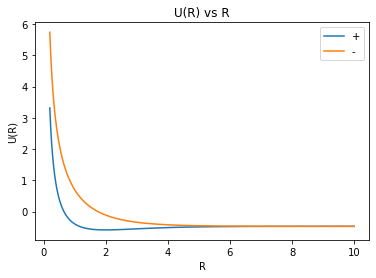

In [6]:
plt.plot(L_R,P_W,label="+")
plt.plot(L_R,P_W2,label="-")
plt.legend()
plt.xlabel("R")
plt.ylabel("U(R)")
plt.title("U(R) vs R")
plt.savefig(fname="U(R) vs R",dpi=600)

2. R vs k (ground state)

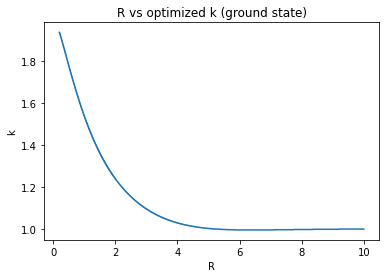

In [7]:
plt.plot(R_R,R_k)
plt.xlabel("R")
plt.ylabel("k")
plt.title("R vs optimized k (ground state)")
plt.savefig(fname="R vs optimized k (ground state)",dpi=600)

3. R vs k (excited state)

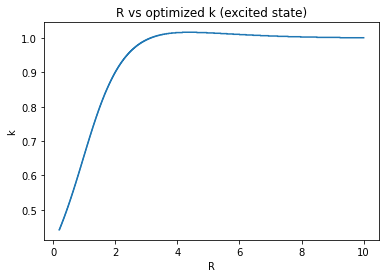

In [8]:
plt.plot(R2_R,R2_k)
plt.xlabel("R")
plt.ylabel("k")
plt.title("R vs optimized k (excited state)")
plt.savefig(fname="R vs optimized k (excited state)",dpi=600)

Calculating the wavefunction in the range -5 to 5 using optimized k and R

In [9]:
R = R_G_Rmin
ra = np.arange(-5+R/2,5+R/2+0.01,0.01)
rb = np.arange(-5-R/2,5-R/2+0.01, 0.01)
r = np.arange(-5,5.01,0.01)
Sa = k**(3/2)*pi**(-1/2)*exp(-k*abs(ra))
Sb = k**(3/2)*pi**(-1/2)*exp(-k*abs(rb))
Sab = exp(-k*R)*(1+k*R)+(k**2*R**2)/3
phi1 = (Sa+Sb)/(1+Sab)
phi2 = (Sa-Sb)/(1-Sab)

Plotting

1. 1Sa

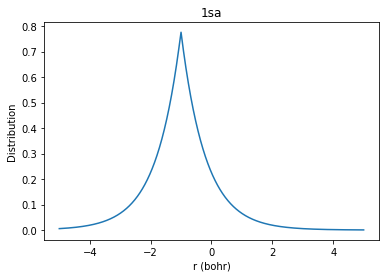

In [10]:
plt.plot(r,Sa)
plt.title("1sa")
plt.xlabel("r (bohr)")
plt.ylabel("Distribution")
plt.savefig(fname="1sa",dpi=600)

2. 1sb

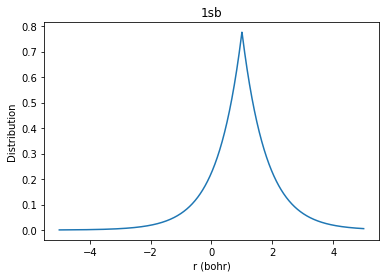

In [11]:
plt.plot(r,Sb)
plt.title("1sb")
plt.xlabel("r (bohr)")
plt.ylabel("Distribution")
plt.savefig(fname="1sb",dpi=600)

3. 1sa square

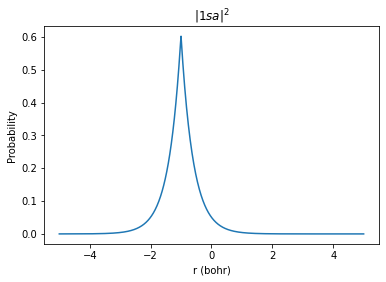

In [12]:
plt.plot(r,Sa**2)
plt.title("$|1sa|^2$")
plt.xlabel("r (bohr)")
plt.ylabel("Probability")
plt.savefig(fname="1sa^2",dpi=600)

4. 1sb square

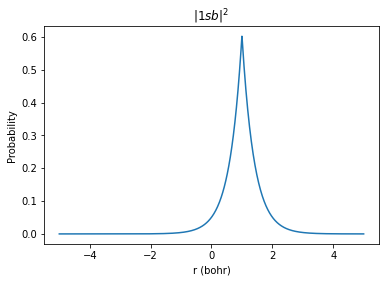

In [13]:
plt.plot(r,Sb**2)
plt.title("$|1sb|^2$")
plt.xlabel("r (bohr)")
plt.ylabel("Probability")
plt.savefig(fname="1sb^2",dpi=600)

5. Φ1

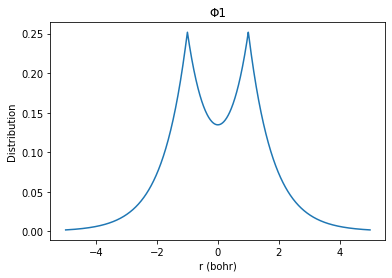

In [14]:
plt.plot(r,phi1)
plt.title("Φ1")
plt.xlabel("r (bohr)")
plt.ylabel("Distribution")
plt.savefig(fname="Φ1",dpi=600)

6. Φ1 square

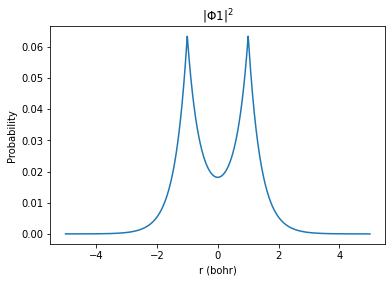

In [15]:
plt.plot(r,phi1**2)
plt.title("$|Φ1|^2$")
plt.xlabel("r (bohr)")
plt.ylabel("Probability")
plt.savefig(fname="Φ1^2",dpi=600)

7. Φ2

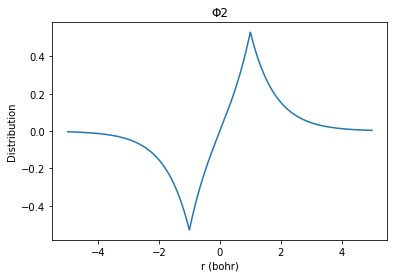

In [16]:
plt.plot(r,phi2)
plt.title("Φ2")
plt.xlabel("r (bohr)")
plt.ylabel("Distribution")
plt.savefig(fname="Φ2",dpi=600)

8. Φ2 square

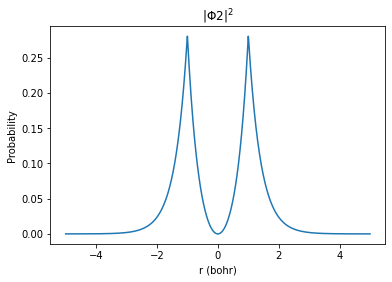

In [17]:
plt.plot(r,phi2**2)
plt.title("$|Φ2|^2$")
plt.xlabel("r (bohr)")
plt.ylabel("Probability")
plt.savefig(fname="Φ2^2",dpi=600)